In [58]:
#Import the packages you will use
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pyogrio import set_gdal_config_options
import geopandas as gpd
import warnings
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go

pd.options.display.max_columns=100
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')


# **Linear Regression**

In [29]:
#Import the data
df = pd.read_csv('NY-House-Dataset.csv', sep=',')
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [11]:
np.sum(df.isnull(),axis = 0) # No null

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [12]:
df.drop(columns = ['BROKERTITLE','ADDRESS','MAIN_ADDRESS','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS'],inplace = True) # drop unusable (for now) features

In [13]:
features_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY','SUBLOCALITY']
for x in features_to_encode:
    one_hot = pd.get_dummies(df[x],drop_first=True,dtype=int)
    df.drop(columns = x, inplace = True)
    df = pd.concat([df, one_hot], axis=1)

In [14]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Coming Soon,Condo for sale,Condop for sale,Contingent,...,New York,New York County,Queens,Queens County,Rego Park,Richmond County,Riverdale,Snyder Avenue,Staten Island,The Bronx
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,...,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601,0.000417,0.185586,0.001041,0.018330,...,0.211623,0.059571,0.115601,0.142470,0.000208,0.099979,0.000833,0.000208,0.012289,0.038325
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082,0.020408,0.388813,0.032258,0.134154,...,0.408501,0.236715,0.319779,0.349568,0.014432,0.300003,0.028855,0.014432,0.110184,0.192001
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X = df.drop(columns = 'PRICE')
y = df['PRICE']

In [24]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a linear regression model
model = LinearRegression()

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

best_coefficients = result.params
print(best_coefficients)

summary = result.summary()
top_10_coef = summary.tables[1].data[1:11]


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     784.4
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:51:05   Log-Likelihood:                -53464.
No. Observations:                3216   AIC:                         1.076e+05
Df Residuals:                    2886   BIC:                         1.096e+05
Df Model:                         329                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [23]:
summary_data = result.summary().tables[1].data[1:11]
top_10_coefficients = [row[1] for row in summary_data]
top_10_standard_errors = [row[2] for row in summary_data]
top_10_t_values = [row[3] for row in summary_data]
top_10_p_values = [row[4] for row in summary_data]

print("Top 10 Coefficients:")
print(top_10_coefficients)
print("Top 10 Standard Errors:")
print(top_10_standard_errors)
print("Top 10 T-values:")
print(top_10_t_values)
print("Top 10 P-values:")
print(top_10_p_values)


Top 10 Coefficients:
['-1.167e+09', '-1.664e+05', ' 4.052e+05', '  692.4050', ' 1.749e+07', '-1.108e+07', '   -0.0008', ' 1.106e+06', ' 2.329e+05', ' 3.734e+05']
Top 10 Standard Errors:
[' 7.34e+08', ' 5.58e+04', ' 7.22e+04', '   46.883', ' 1.29e+07', ' 1.06e+07', '    0.000', ' 2.56e+05', ' 3.13e+06', ' 6.44e+05']
Top 10 T-values:
['   -1.590', '   -2.981', '    5.610', '   14.769', '    1.353', '   -1.050', '   -1.715', '    4.324', '    0.074', '    0.580']
Top 10 P-values:
[' 0.112', ' 0.003', ' 0.000', ' 0.000', ' 0.176', ' 0.294', ' 0.086', ' 0.000', ' 0.941', ' 0.562']


# **SVM**

# **KNN**

In [31]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [32]:
df = df[['PRICE','BEDS','BATH','STREET_NAME','PROPERTYSQFT','LATITUDE','LONGITUDE']]
df.head(5)

,PRICE,BEDS,BATH,STREET_NAME,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,East 55th Street,1400.0,40.761255,-73.974483
1,195000000,7,10.000000,New York,17545.0,40.766393,-73.980991
2,260000,4,2.000000,Staten Island,2015.0,40.541805,-74.196109
3,69000,3,1.000000,New York,445.0,40.761398,-73.974613
4,55000000,7,2.373861,New York,14175.0,40.767224,-73.969856


In [33]:
df.info()
np.sum(df.isnull(),axis = 0) # No null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4801 non-null   int64  
 1   BEDS          4801 non-null   int64  
 2   BATH          4801 non-null   float64
 3   STREET_NAME   4801 non-null   object 
 4   PROPERTYSQFT  4801 non-null   float64
 5   LATITUDE      4801 non-null   float64
 6   LONGITUDE     4801 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 262.7+ KB


PRICE           0
BEDS            0
BATH            0
STREET_NAME     0
PROPERTYSQFT    0
LATITUDE        0
LONGITUDE       0
dtype: int64

In [36]:
df.columns = ['price','beds','bath','street','property','latitude','longitute']
df_price = df.drop('street',axis=1)
df_price

,price,beds,bath,property,latitude,longitute
0,315000,2,2.000000,1400.000000,40.761255,-73.974483
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991
2,260000,4,2.000000,2015.000000,40.541805,-74.196109
3,69000,3,1.000000,445.000000,40.761398,-73.974613
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856
...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,40.774350,-73.955879
4797,245000,1,1.000000,2184.207862,40.732538,-73.860152
4798,1275000,1,1.000000,2184.207862,40.745882,-74.003398
4799,598125,2,1.000000,655.000000,40.742770,-73.872752


In [42]:
df_price.corr()

,price,beds,bath,property,latitude,longitute
price,1.000000,0.052189,0.079371,0.110889,-0.020392,-0.054273
beds,0.052189,1.000000,0.776447,0.420503,-0.060933,-0.004529
bath,0.079371,0.776447,1.000000,0.483935,-0.052235,-0.070892
property,0.110889,0.420503,0.483935,1.000000,0.023413,-0.037308
latitude,-0.020392,-0.060933,-0.052235,0.023413,1.000000,0.513969
longitute,-0.054273,-0.004529,-0.070892,-0.037308,0.513969,1.000000


In [48]:
X = df_price.drop('price',axis=1)
y = df_price['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1,11)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [50]:
for i,k in enumerate(neighbors):

    # Instantiate classifiers
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

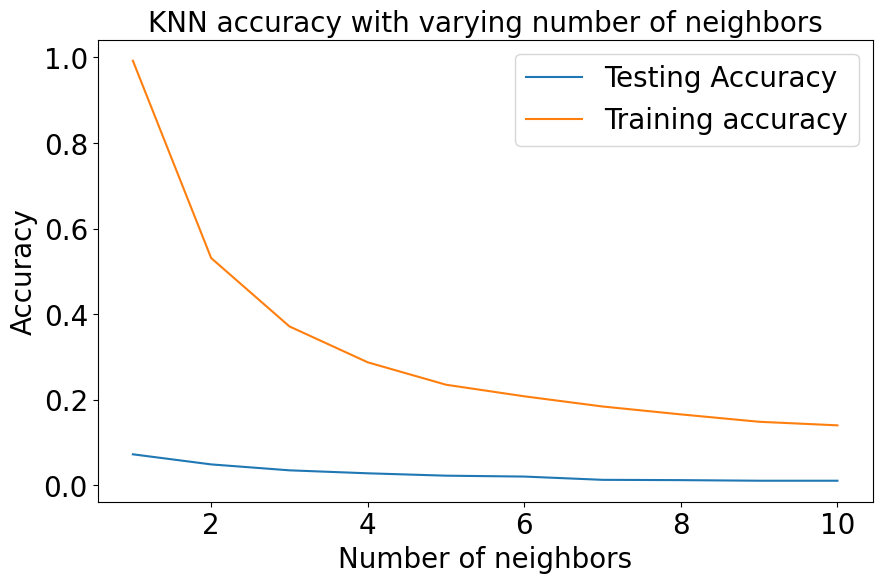

In [51]:
# Plot accuracy per k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# **RF**

In [52]:
data = pd.read_csv('NY-House-Dataset.csv')
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# **EDA**

DriverError: Unable to open tl_2019_us_zcta510.shx or tl_2019_us_zcta510.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.